In [7]:
import psycopg2
import pandas as pd
# Connection parameters
param_dic = {
    "host"      : "lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com",
    "port"      : "5432",
    "user"      : "lhl_student",
    "password"  : "lhl_student",
    "database"  : "mid_term_project"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    print("Connection successful")
    return conn
def postgsql_to_df(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    tupples = cursor.fetchall()
    cursor.close()
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [8]:
col_names = ['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name']

df_flights = postgsql_to_df(connect(param_dic), "select * from flights limit 10000", col_names)
df_flights.head()



Connecting to the PostgreSQL database...
Connection successful


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-12-26,DL,DL,DL,1651,DL,N970DL,1651,10397,ATL,...,554.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-12-26,DL,DL,DL,1652,DL,N997AT,1652,14747,SEA,...,954.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-12-26,DL,DL,DL,1653,DL,N950DN,1653,10397,ATL,...,594.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-12-26,DL,DL,DL,1654,DL,N332NB,1654,14747,SEA,...,1216.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-12-26,DL,DL,DL,1654,DL,N332NB,1654,15376,TUS,...,1216.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [9]:
df_flights.to_csv(r"C:\Users\Dimitri Salavaci\midterm_project\mid-term-project-I\flights.csv")

In [10]:
col_names = ['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail',
       'distance', 'ramp_to_ramp', 'air_time', 'unique_carrier',
       'airline_id', 'unique_carrier_name', 'region', 'carrier', 'carrier_name',
       'carrier_group', 'carrier_group_new', 'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name', 'dest_airport_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_country',
       'dest_country_name', 'aircraft_group', 'aircraft_type', 'aircraft_config',
       'month', 'year', 'distance_group', 'class', 'data_source']

df_passengers = postgsql_to_df(connect(param_dic), "select * from passengers limit 10000", col_names)
df_passengers.head()

Connecting to the PostgreSQL database...
Connection successful


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class,data_source
0,0.0,1.0,12500.0,50.0,47.0,0.0,0.0,304.0,150.0,98.0,...,US,United States,6,629,1,2016,3,1,F,DU
1,0.0,1.0,21502.0,76.0,63.0,0.0,0.0,771.0,169.0,145.0,...,US,United States,6,638,1,2016,3,2,F,DU
2,0.0,1.0,21502.0,76.0,76.0,0.0,0.0,856.0,244.0,199.0,...,US,United States,6,638,1,2016,3,2,F,IU
3,0.0,1.0,11118.0,50.0,41.0,0.0,0.0,87.0,59.0,39.0,...,US,United States,6,675,1,2016,3,1,F,DU
4,0.0,1.0,11118.0,50.0,40.0,0.0,0.0,140.0,98.0,78.0,...,US,United States,6,675,1,2016,3,1,F,DU


In [ ]:
df_passengers.to_csv(r"C:\Users\Dimitri Salavaci\midterm_project\mid-term-project-I\data\passengers.csv")

In [12]:
col_names = ['month', 'airline_id', 'unique_carrier', 'carrier',
       'carrier_name', 'carrier_group_new', 'sdomt_gallons',
       'satl_gallons', 'spac_gallons', 'slat_gallons', 'sint_gallons',
       'ts_gallons', 'tdomt_gallons', 'tint_gallons', 'total_gallons', 'sdomt_cost',
       'satl_cost', 'spac_cost', 'slat_cost', 'sint_cost', 'ts_cost',
       'tdomt_cost', 'tint_cost', 'total_cost', 'year']

df_fuel_comsumption = postgsql_to_df(connect(param_dic), "select * from fuel_comsumption limit 10000", col_names)
df_fuel_comsumption.head()

Connecting to the PostgreSQL database...
Connection successful


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,None,0JQ,None,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016


In [17]:
df_fuel_comsumption.to_csv(r"C:\Users\Dimitri Salavaci\midterm_project\mid-term-project-I\data\fuel_comsumption.csv")

In [13]:
col_names = ['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'crs_arr_time',
       'dup', 'crs_elapsed_time', 'flights', 'distance']

df_flights_test = postgsql_to_df(connect(param_dic), "select * from flights_test limit 10000", col_names)
df_flights_test.head()

Connecting to the PostgreSQL database...
Connection successful


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


In [20]:
df_flights_test.to_csv(r"C:\Users\Dimitri Salavaci\midterm_project\mid-term-project-I\data\flights_test.csv")

In [14]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from datetime import datetime as dt

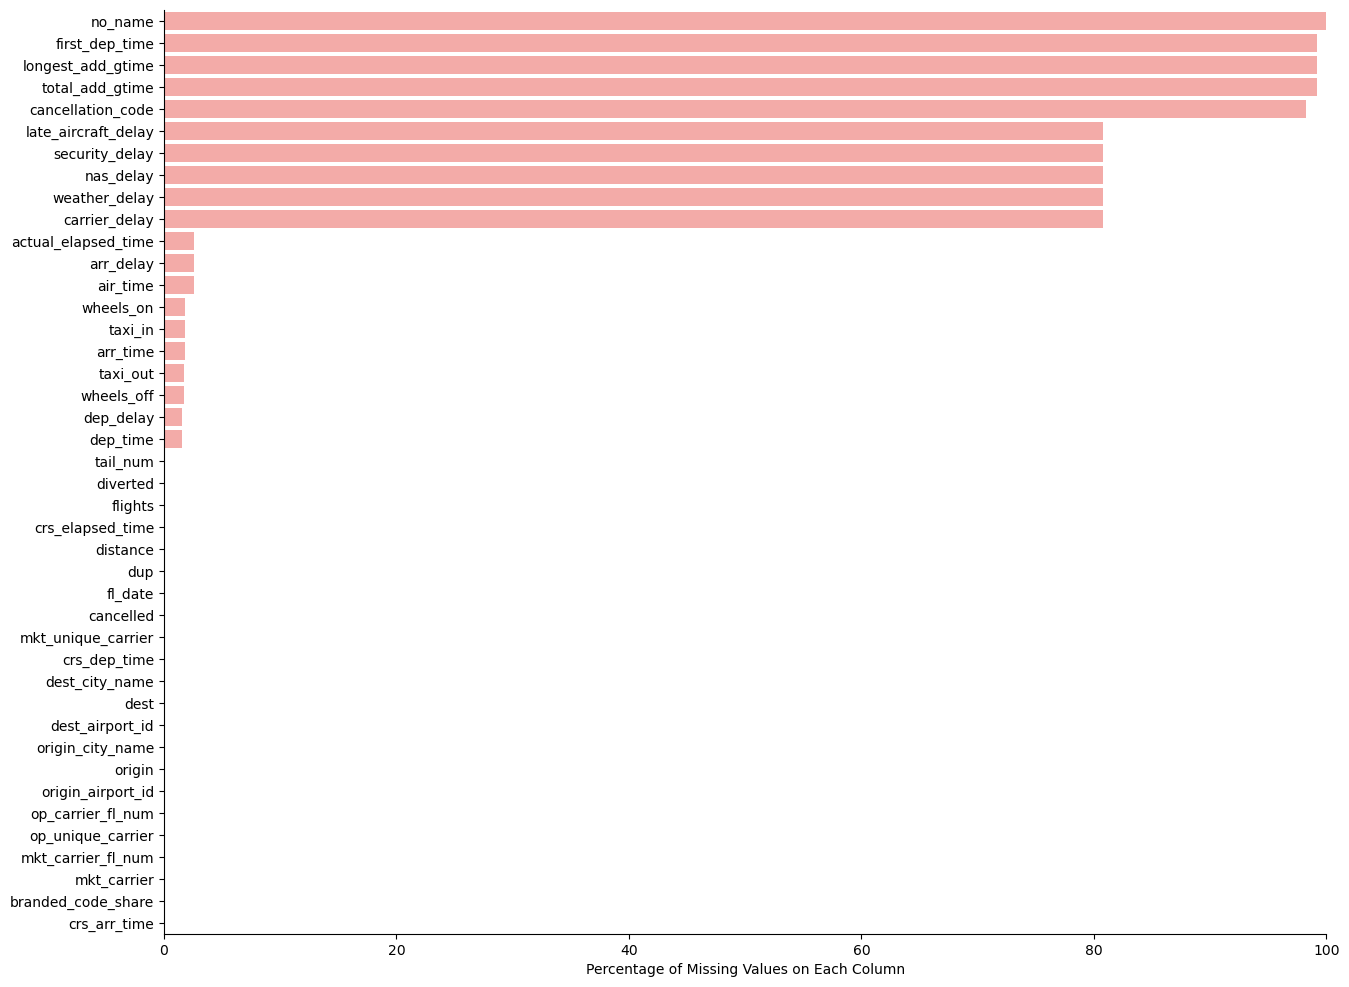

In [15]:
#Data Cleaning

#plotting the percentage of missing values in each column
flights_length = len(df_flights)
flights_null = (df_flights.isnull().sum().sort_values(ascending=False)*100/len(df_flights))
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Percentage of Missing Values on Each Column")
sns.barplot(x=flights_null.values, y=flights_null.index, color="r")
sns.despine()

In [16]:
#Dropping columns with above 75 percentage of missing values in flights_raw

flights_updated = df_flights.drop(columns = ['no_name','cancellation_code', 'longest_add_gtime','total_add_gtime'
                                          ,'first_dep_time','late_aircraft_delay','security_delay',
                                          'nas_delay','weather_delay','carrier_delay'],axis=1)

## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [17]:
flights_updated.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

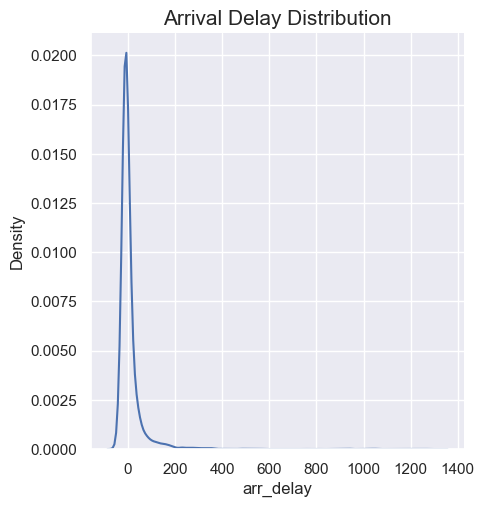

In [18]:
#arrival delay distribution
sns.set_theme(style="darkgrid")
sns.displot(flights_updated, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

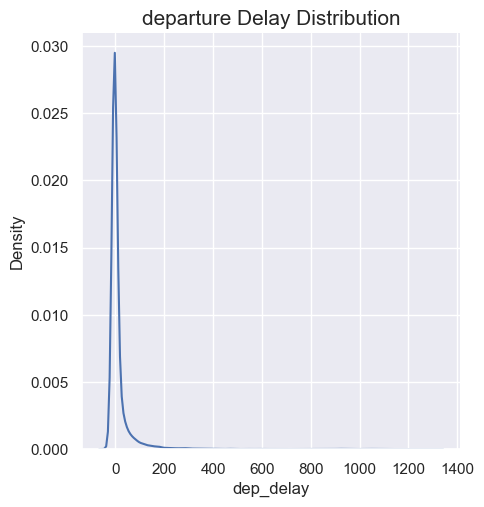

In [19]:
#departure delay
sns.set_theme(style="darkgrid")
sns.displot(flights_updated, x="dep_delay",kind='kde')
plt.title("departure Delay Distribution", size=15)
plt.show()

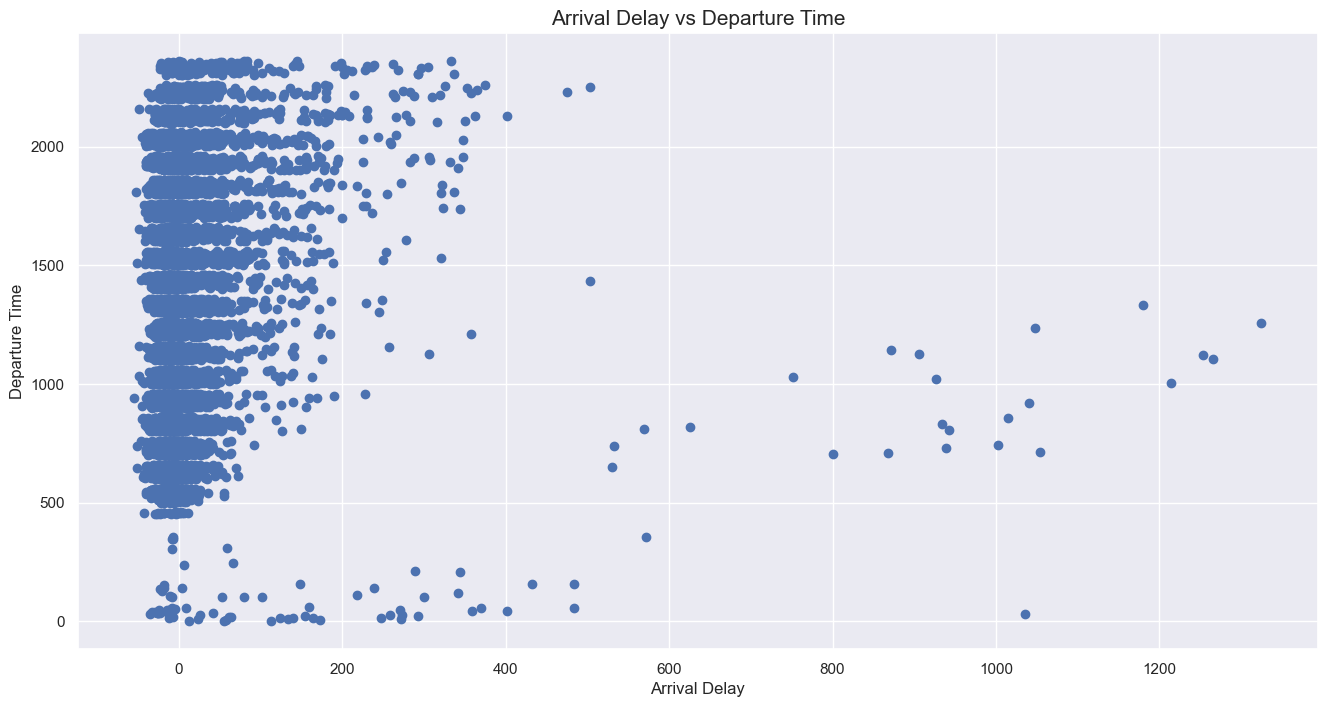

In [20]:
#Scatter plot of Arrival Delay
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(flights_updated['arr_delay'], flights_updated['dep_time'])
ax.set_xlabel('Arrival Delay')
ax.set_ylabel('Departure Time')
plt.title("Arrival Delay vs Departure Time", size=15)
plt.show()

In [21]:
#Removing the Outliers
flights_no_outlier = flights_updated.loc[(flights_updated['arr_delay'] <= 350)\
                                 & (flights_updated['arr_delay'] >= -100)]
flights_no_outlier = flights_no_outlier.loc[(flights_no_outlier['dep_delay'] <=350)\
                                            & (flights_no_outlier['dep_delay'] >=-100)]

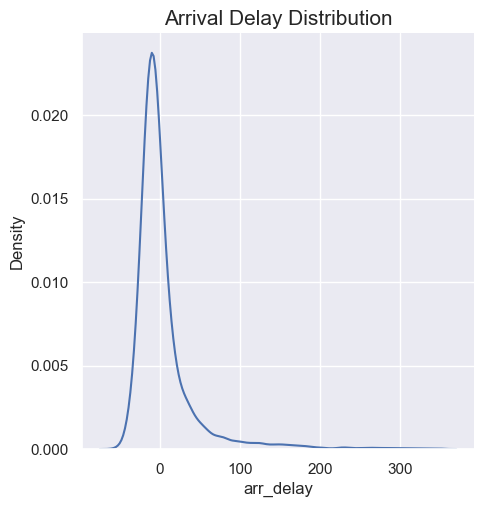

In [22]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

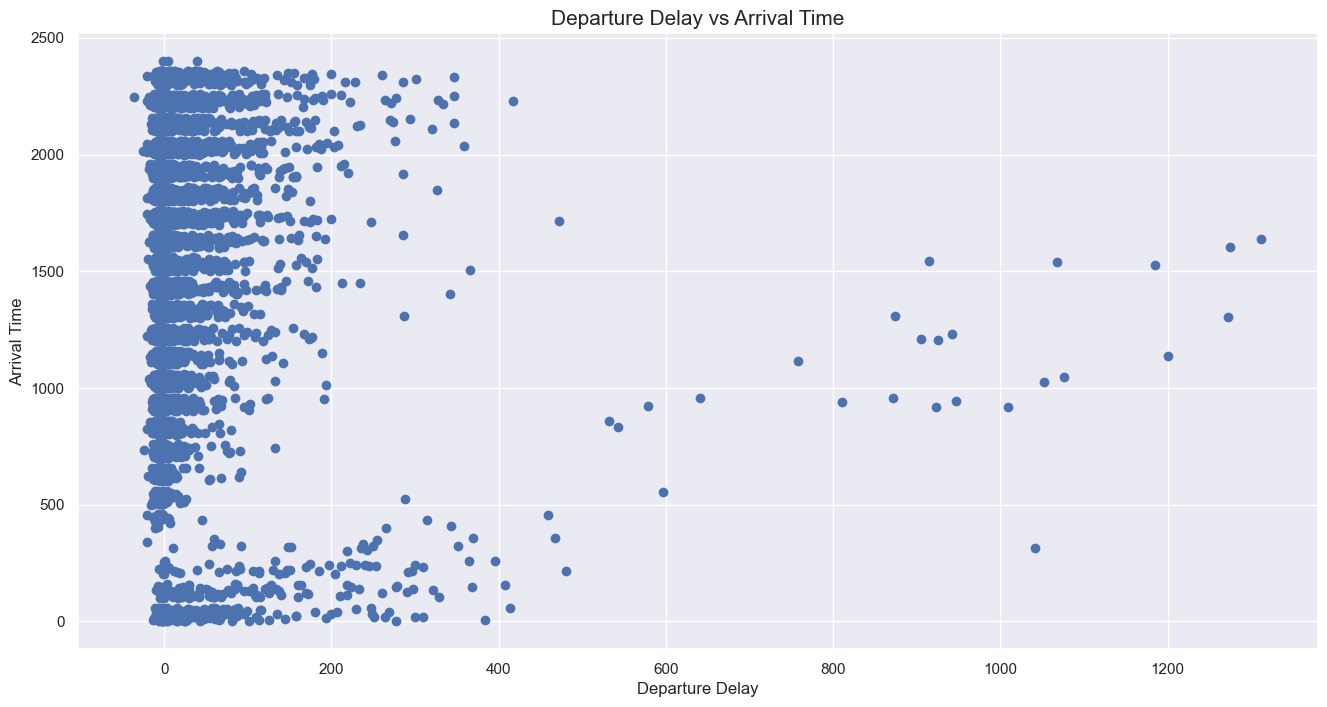

In [23]:
#Scatter plot of Departure Delay
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(flights_updated['dep_delay'], flights_updated['arr_time'])
ax.set_xlabel('Departure Delay')
ax.set_ylabel('Arrival Time')
plt.title("Departure Delay vs Arrival Time", size=15)
plt.show()

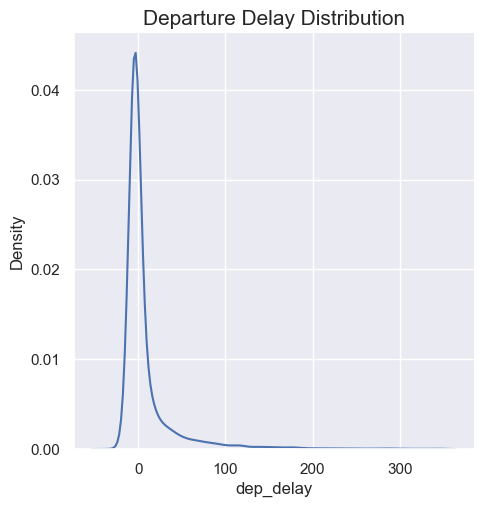

In [24]:
# Departure Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()

In [25]:
#Remvoving outliers for Arrival
Q1_arrival = flights_updated.arr_delay.quantile(0.25)
Q3_arrival = flights_updated.arr_delay.quantile(0.75)
IQR_arrival = Q3_arrival - Q1_arrival
flights_no_outlier_iqr = flights_updated.loc[(flights_updated['arr_delay'] >= (Q1_arrival - 1.5* IQR_arrival))\
                                     & (flights_updated['arr_delay'] <= Q3_arrival + 1.5* IQR_arrival)]

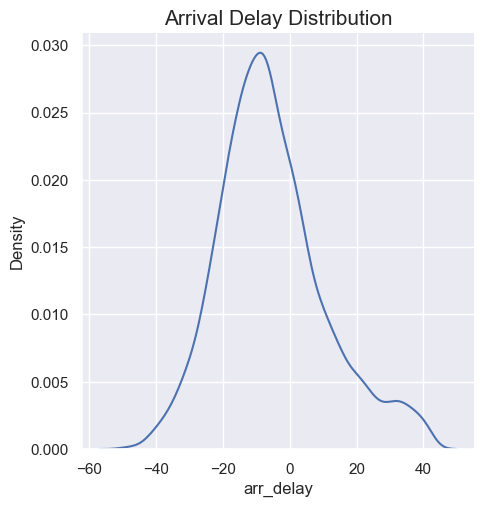

In [26]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [27]:
# Removing outliers for departure delay
Q1_dep = flights_updated.dep_delay.quantile(0.25)
Q3_dep = flights_updated.dep_delay.quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
flights_no_outlier_iqr = flights_updated.loc[(flights_updated['dep_delay'] >= (Q1_dep - 1.5*IQR_dep))\
                                     & (flights_updated['dep_delay'] <= Q3_dep + 1.5*IQR_dep)]

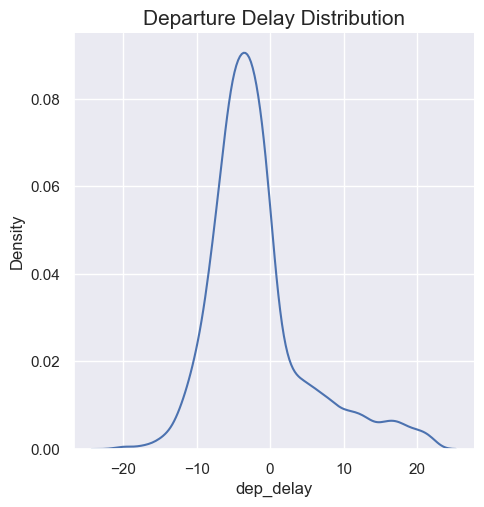

In [28]:
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [29]:
flights_updated['fl_date'] = pd.to_datetime(flights_updated['fl_date'])
flights_updated['month'] = flights_updated['fl_date'].dt.month

In [30]:
arr_del_mean_month = flights_updated.groupby('month')['arr_delay'].mean()

In [31]:
dep_del_mean_month = flights_updated.groupby('month')['dep_delay'].mean()

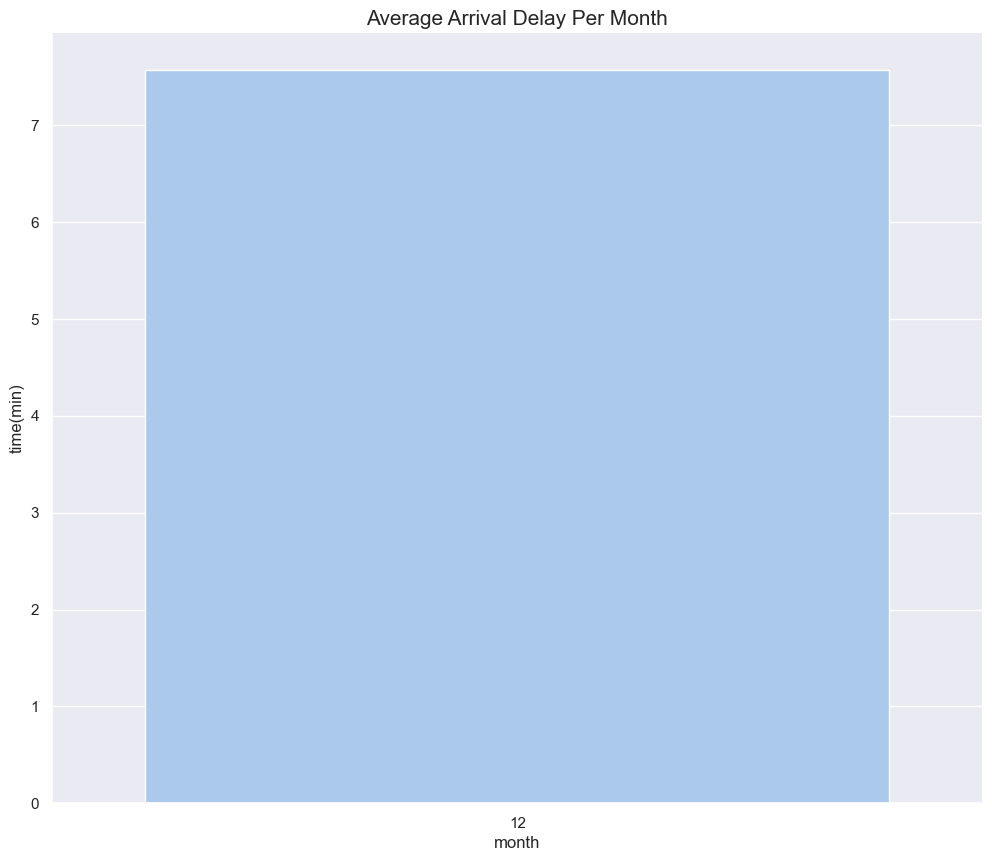

In [32]:
#mean of arrival dealy for each month
f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="time(min)")
sns.barplot(x=arr_del_mean_month.index, y=arr_del_mean_month.values, color="b")
plt.title("Average Arrival Delay Per Month", size=15)
sns.despine()

In [ ]:
#mean of departure dealy for each month
f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="time(min)")
sns.barplot(x=dep_del_mean_month.index, y=dep_del_mean_month.values, color="b")
plt.title("Average Departure Delay Per Month", size=15)
sns.despine()

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [96]:
#function to change integer time to standard time in string
def time_row(row):
    row_int = int(row)
    row_str = str(row_int)
    len_row = len(row_str)
    if len_row == 1:
        minute = row_str
        hour = '00'
        row = hour + ':' + minute
    if len_row == 2:
        minute =  row_str[0] + row_str[1]
        hour = '00'
        row = hour + ':' + minute
    if len_row == 3:
        minute = row_str[1]+row_str[2]
        hour = row_str[0]
        row = hour + ':' + minute
    elif len_row == 4:
        minute = row_str[2] + row_str[3]
        hour = row_str[0] + row_str[1]
        row = hour + ':' + minute
        if row == '24:00':
            row = '23:59'
    return str(row)

In [ ]:
#applyting the function and changing to format to date and time
flights_updated['dep_time_format'] = flights_updated['dep_time'].apply(time_row)

flights_updated['dep_time_format'] = pd.to_datetime(\
                                                       flights_updated['dep_time_format'],\
                                                       format='%H:%M').dt.time

taxi_out_mean_hour = flights_updated.groupby(by=[flights_updated\
                                                    .dep_time_format.map(\
                                                    lambda x : (x.hour))])['taxi_out'].mean()
number_of_departures = flights_updated.groupby(by=[flights_updated.dep_time_format.map(lambda x : (x.hour))])['taxi_out'].count()


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [43]:
top_states_number_flights = flights_updated.groupby('origin_city_name')['taxi_in'].count().sort_values(ascending=False).head(18)
sum_top_number_flights = top_states_number_flights.values.sum()
total_number_flights = flights_updated.groupby('origin_city_name')['taxi_in'].count().sort_values(ascending=False).sum()

#### **Task 6**: How many states cover 50% of US air traffic? 

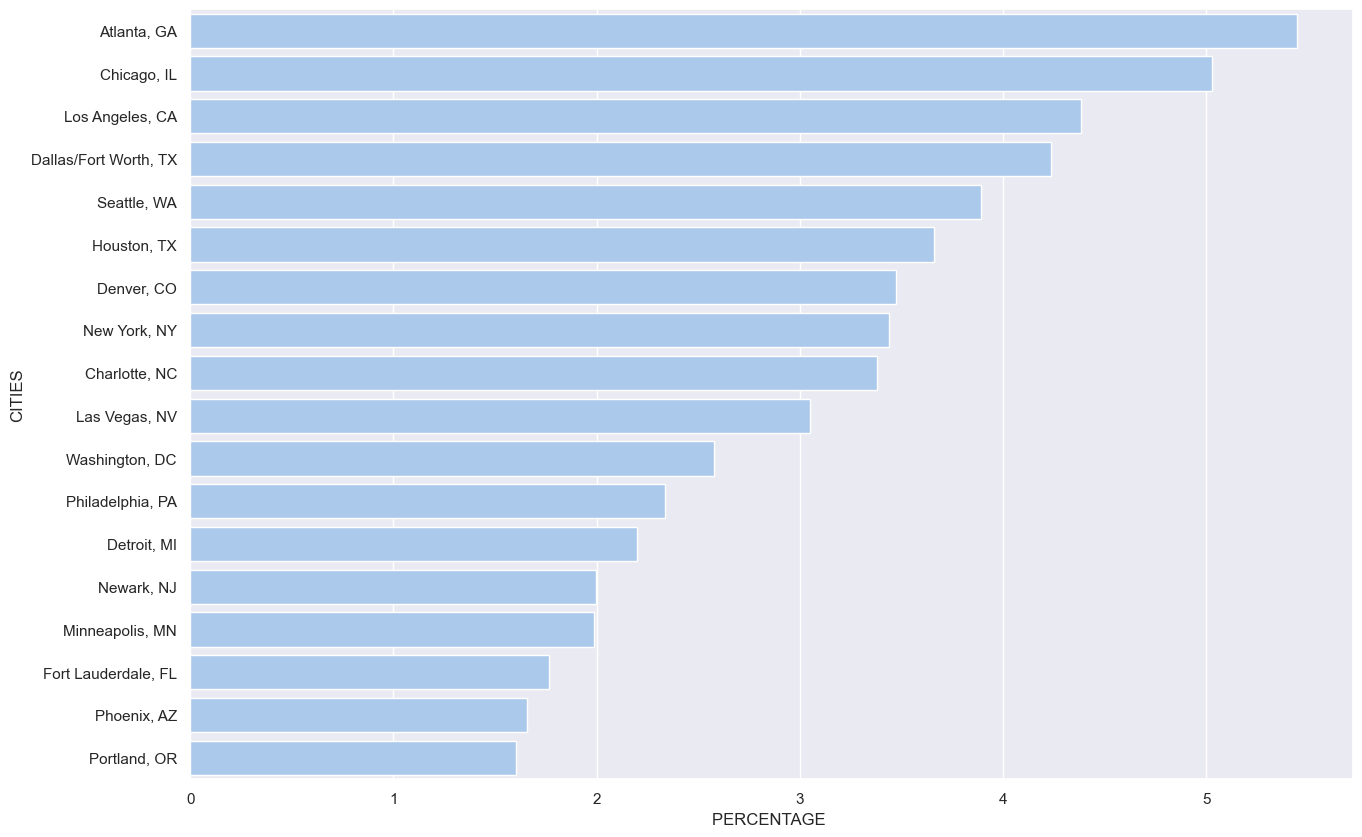

In [117]:
fig, axes = plt.subplots(figsize=(15,10))
sns.barplot(ax=axes, x=(top_states_number_flights.values/total_number_flights)*100, y=top_states_number_flights.index,color='b')
axes.set_xlabel('PERCENTAGE ')
axes.set_ylabel('CITIES')
plt.show()

In [46]:
#total percentage contribution from 18 states
percentage = sum_top_number_flights/total_number_flights* 100
percentage

56.11518009431122

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [47]:
hyp = flights_updated[['fl_date','origin_airport_id','origin_city_name','dest_airport_id','dest_city_name','dep_delay','arr_delay','air_time','distance']]
hyp.head()

,fl_date,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,dep_delay,arr_delay,air_time,distance
0,2018-12-24,11278,"Washington, DC",13871,"Omaha, NE",19.0,-9.0,147.0,1012.0
1,2018-12-24,11278,"Washington, DC",14307,"Providence, RI",-3.0,-11.0,57.0,356.0
2,2018-12-24,11278,"Washington, DC",14307,"Providence, RI",-8.0,-16.0,57.0,356.0
3,2018-12-24,11278,"Washington, DC",15016,"St. Louis, MO",-6.0,-29.0,111.0,719.0
4,2018-12-24,11278,"Washington, DC",15016,"St. Louis, MO",-4.0,-27.0,110.0,719.0


In [48]:
dist = hyp['distance']
time = hyp['air_time']
hyp['avg_speed'] = dist/time*60
hyp.head()

C:\Users\Dimitri Salavaci\AppData\Local\Temp\ipykernel_24404\3217422274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp['avg_speed'] = dist/time*60


,fl_date,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,dep_delay,arr_delay,air_time,distance,avg_speed
0,2018-12-24,11278,"Washington, DC",13871,"Omaha, NE",19.0,-9.0,147.0,1012.0,413.061224
1,2018-12-24,11278,"Washington, DC",14307,"Providence, RI",-3.0,-11.0,57.0,356.0,374.736842
2,2018-12-24,11278,"Washington, DC",14307,"Providence, RI",-8.0,-16.0,57.0,356.0,374.736842
3,2018-12-24,11278,"Washington, DC",15016,"St. Louis, MO",-6.0,-29.0,111.0,719.0,388.648649
4,2018-12-24,11278,"Washington, DC",15016,"St. Louis, MO",-4.0,-27.0,110.0,719.0,392.181818


In [50]:
# Get all flights where there is departure delay > 0
delay_above0speeds = hyp.loc[(hyp['dep_delay'] > 0) & (hyp['dep_delay'].notna()), 'avg_speed']
delay_above0speeds.describe()

count    2082.000000
mean      416.362237
std        78.547360
min       143.076923
25%       366.920691
50%       419.617819
75%       472.030612
max       572.918288
Name: avg_speed, dtype: float64

In [52]:
# Get all flights where departure == 0
delay_0_speeds = hyp.loc[(hyp['dep_delay'] == 0) & (hyp['dep_delay'].notna()), 'avg_speed']
delay_0_speeds.describe()

count    467.000000
mean     422.752268
std       78.680250
min      210.909091
25%      373.697917
50%      427.857143
75%      481.219512
max      563.348416
Name: avg_speed, dtype: float64

In [116]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.scatter( x = hyp['avg_speed'], y = hyp['dep_delay'], labels={'x':'Average Speed', 'y':'Departure Delay'})
fig.show()

In [54]:
#remove outliers
def reject_outliers(hyp, m=3):
    return hyp[abs(hyp - np.mean(hyp)) < m * np.std(hyp)]

In [55]:
delay_above0speeds_no_ol = reject_outliers(delay_above0speeds, m=3)
delay_0_speeds_no_ol = reject_outliers(delay_0_speeds, m=2)

delay_above0speeds_no_ol.mean(), delay_0_speeds_no_ol.mean()

(416.86245635107656, 431.4242650576609)

In [56]:
from scipy.stats import ttest_ind
# Taking a sample size of 1000 from each
ttest,pval = ttest_ind(delay_above0speeds_no_ol[:10000], delay_0_speeds_no_ol[:10000])

print("p-value",pval)
if pval <0.05:
  print("Reject null hypothesis")
else:
  print("Accept null hypothesis")

p-value 0.00026257543113402803
Reject null hypothesis


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [60]:
df_flights['dep_time'] = pd.to_datetime(df_flights['dep_time']).drop(columns=['Unnamed: 0'])
df_flights['arr_time'] = pd.to_datetime(df_flights['arr_time'])

In [118]:
flights_short = df_flights.loc[df_flights['air_time'] <=180]
flights_med = df_flights.loc[(df_flights['air_time'] >= 180) & df_flights['air_time'] <= 360]
flights_long = df_flights.loc[df_flights['air_time'] > 360]

In [119]:
short_flights_time = flights_short.groupby(by=[flights_short.dep_time.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)
med_flights_time = flights_med.groupby(by=[flights_med.dep_time.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)
long_flights_time = flights_long.groupby(by=[flights_med.dep_time.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)



In [ ]:
#plotting each flight
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Short, Medium and Long Flights')

#Short FLights
sns.barplot(ax=axes[0], x=short_flights_time.index, y=short_flights_time.values,color='r')
axes[0].set_title('Short Flights For Different Hours')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Number Of Flights')
#Medium Flights
sns.barplot(ax=axes[1], x=med_flights_time.index, y=med_flights_time.values,color='r')
axes[1].set_title('Medium Flights For Different Hours')
axes[1].set_xlabel('Hours Of The Day')
axes[1].set_ylabel('Number Of Flights')

sns.barplot(ax=axes[2],x=long_flights_time.index, y=long_flights_time.values,color='r')
axes[2].set_title('Long Flights For Different Hours')
axes[2].set_xlabel('Hours Of The Day')
axes[2].set_ylabel('Number Of Flights')
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [77]:
airports_origin = pd.DataFrame(
    df_flights.groupby(['origin','origin_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)

airports_destination = pd.DataFrame(
    df_flights.groupby(['dest','dest_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)

In [81]:
airports_origin = airports_origin.sort_values(by='flight_count', ascending=False)[:10]
airports_destination = airports_destination.sort_values(by='flight_count', ascending=False)[:10]

In [82]:
airports_origin['id, city'] = airports_origin[['origin','origin_city_name']].agg(', '.join, axis=1)
airports_destination['id, city'] = airports_destination[['dest','dest_city_name']].agg(', '.join, axis=1)

In [83]:
passengers_airports_origin = pd.DataFrame(
                df_passengers.groupby(['origin','origin_city_name'])['passengers']
                .sum().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_origin = passengers_airports_origin.sort_values(by='total_passengers', ascending=False)[:10]


passengers_airports_destination = pd.DataFrame(
    df_passengers.groupby(['dest','dest_city_name'])['passengers']
    .sum().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_destination = passengers_airports_destination.sort_values(by='total_passengers', ascending=False)[:10]

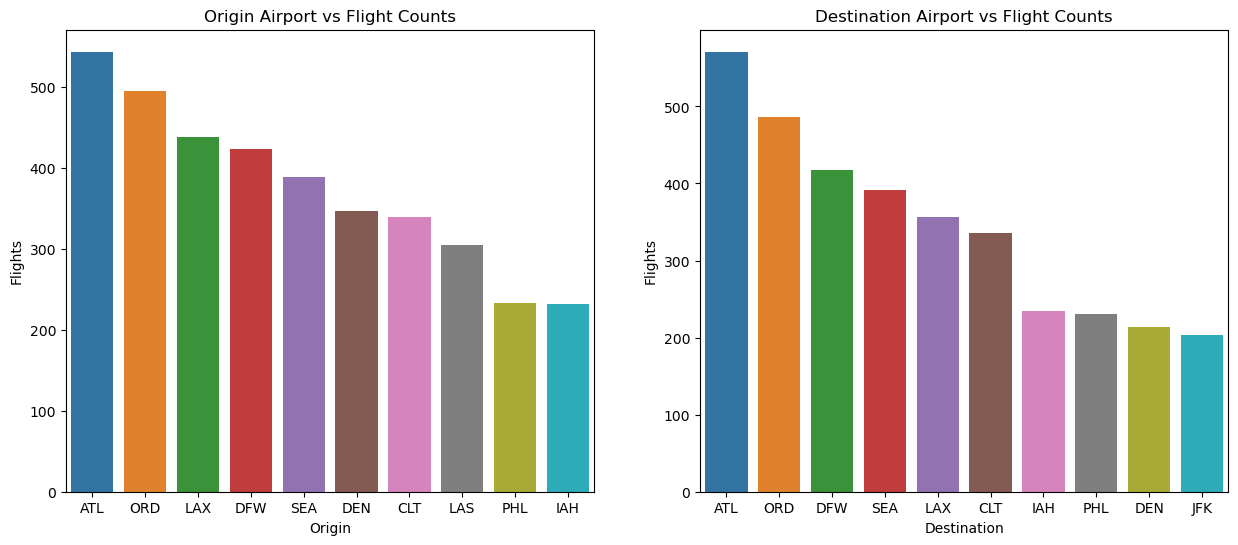

In [84]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='flight_count', data=airports_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='flight_count', data=airports_destination, ax=axes[1])

ax1.set(title='Origin Airport vs Flight Counts', xlabel='Origin', ylabel='Flights')
ax2.set(title='Destination Airport vs Flight Counts', xlabel='Destination', ylabel='Flights');

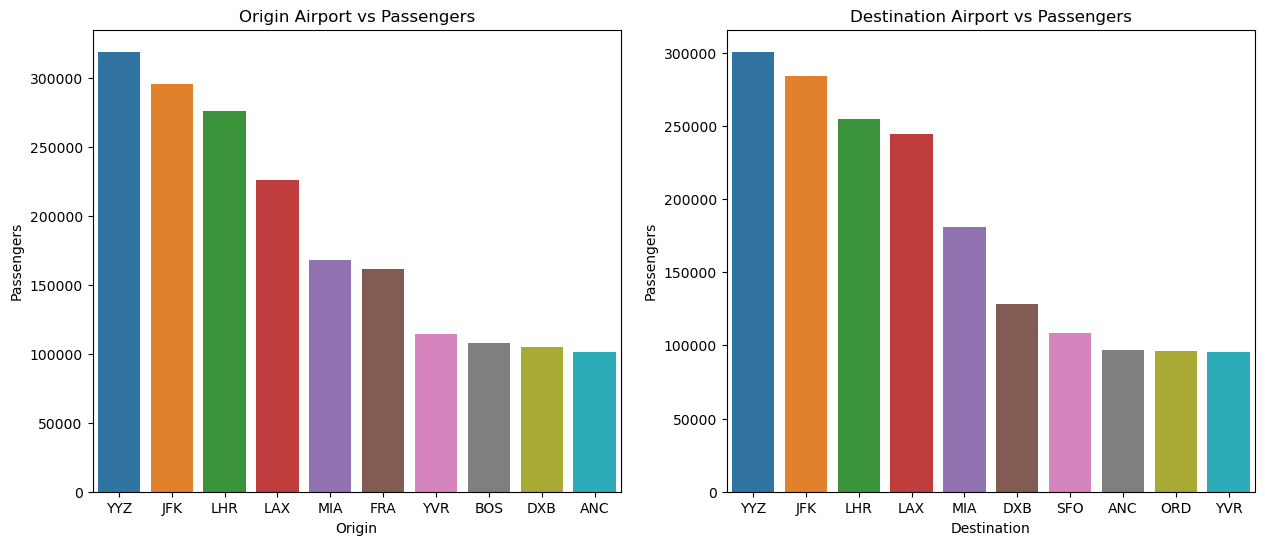

In [85]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='total_passengers', data=passengers_airports_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='total_passengers', data=passengers_airports_destination, ax=axes[1])

ax1.set(title='Origin Airport vs Passengers', xlabel='Origin', ylabel='Passengers')
ax2.set(title='Destination Airport vs Passengers', xlabel='Destination', ylabel='Passengers');

In [86]:
passengers_airports_origin

,origin,origin_city_name,total_passengers
669,YYZ,"Toronto, Canada",318686.0
277,JFK,"New York, NY",295070.0
346,LHR,"London, United Kingdom",275827.0
334,LAX,"Los Angeles, CA",226050.0
386,MIA,"Miami, FL",167737.0
196,FRA,"Frankfurt, Germany",161567.0
663,YVR,"Vancouver, Canada",114171.0
68,BOS,"Boston, MA",107573.0
154,DXB,"Dubai, United Arab Emirates",104766.0
32,ANC,"Anchorage, AK",101184.0


In [87]:
pd.merge(airports_origin,passengers_airports_origin,how = "outer", on = "origin")

,origin,origin_city_name_x,flight_count,"id, city",origin_city_name_y,total_passengers
0,ATL,"Atlanta, GA",543.0,"ATL, Atlanta, GA",NaN,NaN
1,ORD,"Chicago, IL",495.0,"ORD, Chicago, IL",NaN,NaN
2,LAX,"Los Angeles, CA",438.0,"LAX, Los Angeles, CA","Los Angeles, CA",226050.0
3,DFW,"Dallas/Fort Worth, TX",423.0,"DFW, Dallas/Fort Worth, TX",NaN,NaN
4,SEA,"Seattle, WA",389.0,"SEA, Seattle, WA",NaN,NaN
5,DEN,"Denver, CO",347.0,"DEN, Denver, CO",NaN,NaN
6,CLT,"Charlotte, NC",339.0,"CLT, Charlotte, NC",NaN,NaN
7,LAS,"Las Vegas, NV",304.0,"LAS, Las Vegas, NV",NaN,NaN
8,PHL,"Philadelphia, PA",233.0,"PHL, Philadelphia, PA",NaN,NaN
9,IAH,"Houston, TX",232.0,"IAH, Houston, TX",NaN,NaN


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [91]:
#take the positive delays; this is for visualisation
flights_ps_delay = df_flights.loc[df_flights['dep_delay'] >= 0]
flights_ps_delay['fl_date'] = pd.to_datetime(flights_ps_delay['fl_date'],format='%Y/%m/%d')
flights_ps_delay['month'] = flights_ps_delay['fl_date'].dt.month
flights_ps_delay['year'] = flights_ps_delay['fl_date'].dt.year

C:\Users\Dimitri Salavaci\AppData\Local\Temp\ipykernel_24404\3357520349.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dimitri Salavaci\AppData\Local\Temp\ipykernel_24404\3357520349.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dimitri Salavaci\AppData\Local\Temp\ipykernel_24404\3357520349.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [92]:
#we will be taking 2019
flights_ps_delay_2019 = flights_ps_delay.loc[(flights_ps_delay['year'] == 2019)]

In [ ]:
#making Dataframe for average delay per month per carrier
avg_car_del_2019 = flights_ps_delay_2019.groupby(['op_unique_carrier','month'])['dep_delay'].mean()
avg_car_del_2019 = pd.DataFrame(avg_car_del_2019).reset_index()